In [91]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk import WordNetLemmatizer


os.getcwd()

'C:\\Users\\Dell\\MASTER COURSES\\CapGemini Datacamp'

##### Additional Remarks on what could be improved:
- Almost every text has "date de l'experience" section at the end. We can remove it.
- Nu

### Read Data

In [28]:
toten = pd.read_csv("Session 2/TotalEnergies_reviews.csv", index_col=0)
eni = pd.read_csv("Session 2/eni_reviews.csv", index_col=0)

In [29]:
display(toten.head())

,text,grade,date
0,Service électricité très bien mais si…\nServic...,1,Il y a 9 heures
1,"Honteux\nHonteux, si je pouvais mettre zéro il...",1,Il y a un jour
2,incompréhension avec le service client…\nincom...,1,ll y a 2 jours
3,très satisfaite\nEn souscrivant en ligne je vo...,5,Il y a un jour
4,Très bonne application\nTrès bonne application...,5,ll y a 5 jours


In [30]:
display(eni.head())

,text,grade,date
0,Catastrophe énergétique\nPremière souscription...,1,Il y a 5 heures
1,Augmentation du prix de kWh X3\nAugmentation d...,1,ll y a 4 jours
2,BRAQUEURS ENI\nSimplement : échéancier 2022 : ...,1,ll y a 6 jours
3,Facture démentielle.\nFacture démentielle.\nLe...,1,ll y a 4 jours
4,A fuir !\nAyant un relevé tous les deux mois p...,1,26 janv. 2023


In [31]:
eni.grade.mean()

1.035

In [32]:
toten.grade.mean()

3.01

In [34]:
#Merge 2 dataframes
eni["company"] = "eni"
toten["company"] = "total"
df = pd.concat([eni, toten], ignore_index=True)
print(df.shape)
df.sample(5)

(400, 4)


,text,grade,date,company
28,Augmentation des tarifs et surprises lors de l...,1,19 déc. 2022,eni
225,"Nouvelle Adhérente 70\nBonjour, 😊 Toutes mes i...",5,13 janv. 2023,total
39,Change les contrats sans prévenir!!!\nLe prix ...,1,5 janv. 2023,eni
378,Très satisfait je recommande mon…\nTrès satisf...,5,9 nov. 2022,total
362,Full marketing pour se remplir les poches au d...,1,22 oct. 2022,total


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     400 non-null    object
 1   grade    400 non-null    int64 
 2   date     400 non-null    object
 3   company  400 non-null    object
 4   n_words  400 non-null    int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 14.2+ KB


### Visualizations

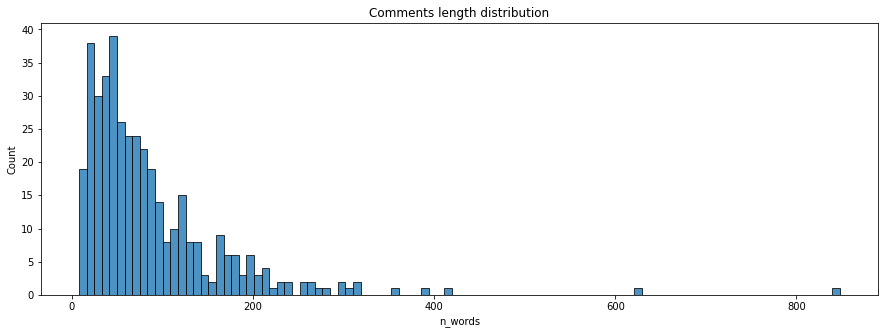

In [40]:
#Density plot of word frequency
df["n_words"] = df['text'].str.split().apply(len).astype(int)
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(df['n_words'], bins=100, alpha=0.8)
plt.title('Comments length distribution')
plt.show()

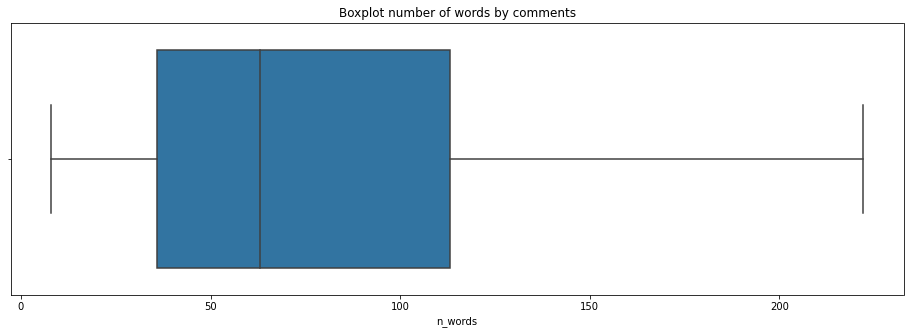

In [43]:
fig, ax = plt.subplots(figsize=(16, 5))
sns.boxplot(x=df['n_words'], showfliers=False)
plt.title('Boxplot number of words by comments')
plt.show()

### Date Visualizations 
Date formatting incomplete

In [46]:
#Format dates
df.date

0      Il y a 5 heures
1       ll y a 4 jours
2       ll y a 6 jours
3       ll y a 4 jours
4        26 janv. 2023
            ...       
395       11 nov. 2022
396        6 nov. 2022
397       24 oct. 2022
398       28 oct. 2022
399       26 oct. 2022
Name: date, Length: 400, dtype: object

In [53]:
#def date_format(date_series):
first_char = df.date.apply(lambda x:x[0])
df.loc[first_char[first_char == "A"].index]

,text,grade,date,company,n_words
11,UN SCANDALE\nVendredi j'ai reçu ma facture de ...,1,Actualisé le 16 janv. 2023,eni,129
37,Démarchage très agressif\nHonteux leur démarch...,1,Actualisé le 13 oct. 2022,eni,75
75,Beaucoup trop cher trop de taxes chez…\nBeauco...,1,Actualisé le 30 juil. 2022,eni,88
97,"Fuyez, pauvres fous !!!\nFournisseur qui ne pr...",1,Actualisé le 23 déc. 2021,eni,94
102,Souscrit par ☎️\nSouscrit après une imbecilité...,3,Actualisé le 9 avr. 2022,eni,50
119,Offre de parrainage jamais reçue malgré plusie...,1,Actualisé le 27 nov. 2021,eni,120
140,A fuir facture multipliée par 7\nAugmentation ...,1,Actualisé le 21 nov. 2022,eni,30
156,fuyez des voleurs des menteurs et hors…\nfuyez...,1,Actualisé le 14 févr. 2022,eni,193
162,Démarcheurs agressifs et menaçants !\nAttentio...,1,Actualisé le 19 nov. 2021,eni,169
173,Ne pas aller chez Eni arnaques\nChers lecteurs...,1,Actualisé le 11 oct. 2021,eni,197


In [54]:
import calendar
month_index = list(calendar.month_name)[1:]
month_index

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

### Text Formatting

In [59]:
corpus = df['text'].tolist()
corpus[:3]

["Catastrophe énergétique\nPremière souscription avec eux en 2021 :\npour la première année aucune régularisation en 2022 à faire montant annuel 880 euros\ndeuxième année 2022 facture de régularisation en 2023 de 1137 euros pour un montant total de consommation de 1880 euros.\nJ'ai essayé de vérifier ma consommation sur mon espace client, je remarque que les données affichées ne sont pas cohérentes (dans un mois de l'année j'étais en vacances, il n'y avait personne à la maison et tout les appareils était éteints).\n\nJ'ai appelé le service client le 01/02/2023 pour avoir des explications, la conseillère me dis qu'elle n'a pas plus de visibilité sur mon dossier, elle a demandé l'intervention d'un autre service qui au jour d'aujourd'hui ne m'a pas rappelé.\n\nUne catastrophe totale, je regrette d'avoir choisi ENI\nDate de l'expérience: 03 février 2023",
 "Augmentation du prix de kWh X3\nAugmentation du prix de kWh X3.\nLes 4 derniers mois équivalent à 1an de consommation habituelle.\nAuc

In [61]:
corpus = [comment.lower() for comment in corpus]
corpus[:3]

["catastrophe énergétique\npremière souscription avec eux en 2021 :\npour la première année aucune régularisation en 2022 à faire montant annuel 880 euros\ndeuxième année 2022 facture de régularisation en 2023 de 1137 euros pour un montant total de consommation de 1880 euros.\nj'ai essayé de vérifier ma consommation sur mon espace client, je remarque que les données affichées ne sont pas cohérentes (dans un mois de l'année j'étais en vacances, il n'y avait personne à la maison et tout les appareils était éteints).\n\nj'ai appelé le service client le 01/02/2023 pour avoir des explications, la conseillère me dis qu'elle n'a pas plus de visibilité sur mon dossier, elle a demandé l'intervention d'un autre service qui au jour d'aujourd'hui ne m'a pas rappelé.\n\nune catastrophe totale, je regrette d'avoir choisi eni\ndate de l'expérience: 03 février 2023",
 "augmentation du prix de kwh x3\naugmentation du prix de kwh x3.\nles 4 derniers mois équivalent à 1an de consommation habituelle.\nauc

In [79]:
from gensim.parsing.preprocessing import remove_stopwords
import unidecode


def clean_sentence(sentence, stopwords=False):
    sentence = sentence.lower().strip()
    sentence = unidecode.unidecode(sentence) #remove accents from letters
    sentence = re.sub(r'[^a-z0-9\s]', ' ', sentence) #remove non-alphanumeric characters
    #sentence = re.sub(r"\d+", "", sentence) #remove numbers
    sentence = re.sub(r"\s+"," ",sentence) #remove whitespace
    
    return sentence

df["clean_text"] = df.text.apply(clean_sentence)
df.clean_text[:3]

0    catastrophe energetique premiere souscription ...
1    augmentation du prix de kwh x3 augmentation du...
2    braqueurs eni simplement echeancier 2022 29 22...
Name: clean_text, dtype: object

In [80]:
df.clean_text[0]

'catastrophe energetique premiere souscription avec eux en 2021 pour la premiere annee aucune regularisation en 2022 a faire montant annuel 880 euros deuxieme annee 2022 facture de regularisation en 2023 de 1137 euros pour un montant total de consommation de 1880 euros j ai essaye de verifier ma consommation sur mon espace client je remarque que les donnees affichees ne sont pas coherentes dans un mois de l annee j etais en vacances il n y avait personne a la maison et tout les appareils etait eteints j ai appele le service client le 01 02 2023 pour avoir des explications la conseillere me dis qu elle n a pas plus de visibilite sur mon dossier elle a demande l intervention d un autre service qui au jour d aujourd hui ne m a pas rappele une catastrophe totale je regrette d avoir choisi eni date de l experience 03 fevrier 2023'

In [78]:
df.text[0]

"Catastrophe énergétique\nPremière souscription avec eux en 2021 :\npour la première année aucune régularisation en 2022 à faire montant annuel 880 euros\ndeuxième année 2022 facture de régularisation en 2023 de 1137 euros pour un montant total de consommation de 1880 euros.\nJ'ai essayé de vérifier ma consommation sur mon espace client, je remarque que les données affichées ne sont pas cohérentes (dans un mois de l'année j'étais en vacances, il n'y avait personne à la maison et tout les appareils était éteints).\n\nJ'ai appelé le service client le 01/02/2023 pour avoir des explications, la conseillère me dis qu'elle n'a pas plus de visibilité sur mon dossier, elle a demandé l'intervention d'un autre service qui au jour d'aujourd'hui ne m'a pas rappelé.\n\nUne catastrophe totale, je regrette d'avoir choisi ENI\nDate de l'expérience: 03 février 2023"

In [89]:
tokenized_corpus = [re.split('\s+', comment) for comment in df.clean_text]
#print(len(tokenized_corpus))
print(tokenized_corpus[0])
df["tokenized_text"] = tokenized_corpus

['catastrophe', 'energetique', 'premiere', 'souscription', 'avec', 'eux', 'en', '2021', 'pour', 'la', 'premiere', 'annee', 'aucune', 'regularisation', 'en', '2022', 'a', 'faire', 'montant', 'annuel', '880', 'euros', 'deuxieme', 'annee', '2022', 'facture', 'de', 'regularisation', 'en', '2023', 'de', '1137', 'euros', 'pour', 'un', 'montant', 'total', 'de', 'consommation', 'de', '1880', 'euros', 'j', 'ai', 'essaye', 'de', 'verifier', 'ma', 'consommation', 'sur', 'mon', 'espace', 'client', 'je', 'remarque', 'que', 'les', 'donnees', 'affichees', 'ne', 'sont', 'pas', 'coherentes', 'dans', 'un', 'mois', 'de', 'l', 'annee', 'j', 'etais', 'en', 'vacances', 'il', 'n', 'y', 'avait', 'personne', 'a', 'la', 'maison', 'et', 'tout', 'les', 'appareils', 'etait', 'eteints', 'j', 'ai', 'appele', 'le', 'service', 'client', 'le', '01', '02', '2023', 'pour', 'avoir', 'des', 'explications', 'la', 'conseillere', 'me', 'dis', 'qu', 'elle', 'n', 'a', 'pas', 'plus', 'de', 'visibilite', 'sur', 'mon', 'dossier', 

### Remove Stopwords

In [88]:
stop_words = nltk.corpus.stopwords.words("french")
stop_words = [unidecode.unidecode(stopword) for stopword in stop_words]
print(stop_words)

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'meme', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'a', 'm', 'n', 's', 't', 'y', 'ete', 'etee', 'etees', 'etes', 'etant', 'etante', 'etants', 'etantes', 'suis', 'es', 'est', 'sommes', 'etes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'etais', 'etait', 'etions', 'etiez', 'etaient', 'fus', 'fut', 'fumes', 'futes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fut', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [90]:
tokenized_wo_stopwords = [[token for token in sentence if token not in stop_words] for sentence in tokenized_corpus_nltk]
print(tokenized_wo_stopwords[0])
df["tokenized_text"] = tokenized_wo_stopwords

['catastrophe', 'energetique', 'premiere', 'souscription', '2021', 'premiere', 'annee', 'aucune', 'regularisation', '2022', 'faire', 'montant', 'annuel', '880', 'euros', 'deuxieme', 'annee', '2022', 'facture', 'regularisation', '2023', '1137', 'euros', 'montant', 'total', 'consommation', '1880', 'euros', 'essaye', 'verifier', 'consommation', 'espace', 'client', 'remarque', 'donnees', 'affichees', 'coherentes', 'mois', 'annee', 'vacances', 'personne', 'maison', 'tout', 'appareils', 'eteints', 'appele', 'service', 'client', '01', '02', '2023', 'avoir', 'explications', 'conseillere', 'dis', 'plus', 'visibilite', 'dossier', 'demande', 'intervention', 'autre', 'service', 'jour', 'aujourd', 'hui', 'rappele', 'catastrophe', 'totale', 'regrette', 'avoir', 'choisi', 'eni', 'date', 'experience', '03', 'fevrier', '2023']


### Defining n-grams

In [154]:
#bigram
df["bigrams"] = [nltk.bigrams(i) for i in df.tokenized_text]
df["bigrams"] = [[i for i in item] for item in df.bigrams] 
df.bigrams

0      [(catastrophe, energetique), (energetique, pre...
1      [(augmentation, prix), (prix, kwh), (kwh, x3),...
2      [(braqueurs, eni), (eni, simplement), (simplem...
3      [(facture, dementielle), (dementielle, facture...
4      [(fuir, releve), (releve, tous), (tous, deux),...
                             ...                        
395    [(rapide, efficace), (efficace, clair), (clair...
396    [(souscription, total), (total, energie), (ene...
397    [(bien, cordialement), (cordialement, date), (...
398    [(aucun, probleme), (probleme, date), (date, e...
399    [(aucun, probleme), (probleme, date), (date, e...
Name: bigrams, Length: 400, dtype: object

In [155]:
df["trigrams"] = [nltk.trigrams(i) for i in df.tokenized_text]
df["trigrams"] = [[i for i in item] for item in df.trigrams] 
df.trigrams

0      [(catastrophe, energetique, premiere), (energe...
1      [(augmentation, prix, kwh), (prix, kwh, x3), (...
2      [(braqueurs, eni, simplement), (eni, simplemen...
3      [(facture, dementielle, facture), (dementielle...
4      [(fuir, releve, tous), (releve, tous, deux), (...
                             ...                        
395    [(rapide, efficace, clair), (efficace, clair, ...
396    [(souscription, total, energie), (total, energ...
397    [(bien, cordialement, date), (cordialement, da...
398    [(aucun, probleme, date), (probleme, date, exp...
399    [(aucun, probleme, date), (probleme, date, exp...
Name: trigrams, Length: 400, dtype: object

### Term Frequency

In [159]:
wordSet = set().union(*df.tokenized_text)
len(wordSet)

3811

In [165]:
wordDict = []

for i in range(len(df.tokenized_text)):
    wordDict.append(dict.fromkeys(wordSet, 0))


In [166]:
for i, sent in enumerate(df.tokenized_text): 
    for word in sent:
        wordDict[i][word]+=1

In [168]:
#assign word_dict to dataframe, useful for the computations later 
word_df = pd.DataFrame(wordDict)

In [170]:
#length of phrases (check if the dict is correct)
word_df[word_df == 1].sum(axis=1)

0      50.0
1      28.0
2      27.0
3      66.0
4      24.0
       ... 
395     8.0
396    11.0
397     7.0
398     7.0
399     7.0
Length: 400, dtype: float64

In [181]:
df["wordDict"] = wordDict

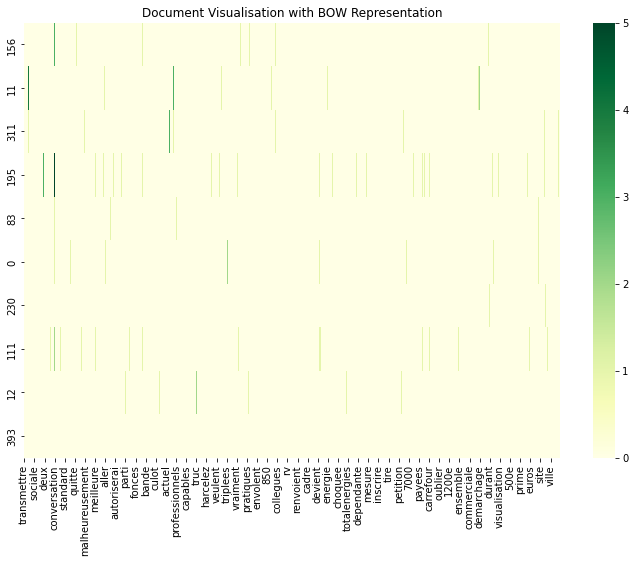

In [173]:
plt.figure(figsize=(12,8))
sns.heatmap(word_df.sample(10), cmap='YlGn')
plt.title('Document Visualisation with BOW Representation')
plt.show()

In [176]:
df_mean = word_df.mean().sort_values(ascending=False).to_frame(name='occurence mean')

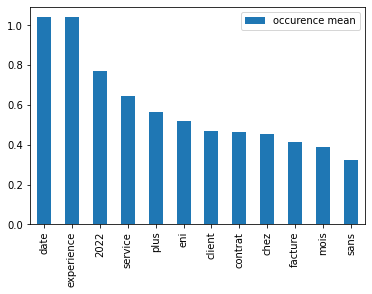

In [231]:
df_mean[:12].plot.bar()
plt.show()

- We can remove the word "date" it has no significance

In [185]:
def compute_TF(wordDict, tokens):
    tfDict = {}
    bowCount = len(tokens)
    for word, count in wordDict.items():
        if bowCount>0:
            tfDict[word] = count/float(bowCount)
        else:
            tfDict[word] = 0
    return tfDict

df["tfBOW"] = [compute_TF(wordDict=df.wordDict[i], tokens=df.tokenized_text[i])
                  for i in range(len(df))]

In [188]:
df.tfBOW

0      {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
1      {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
2      {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
3      {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
4      {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
                             ...                        
395    {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
396    {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
397    {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
398    {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
399    {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
Name: tfBOW, Length: 400, dtype: object

In [218]:
import math
def compute_IDF(wordDict):
    idfDict = {}
    N = len(wordDict)
    idfDict = dict.fromkeys(wordDict[0].keys(), 0)
    #print(idfDict)
    for doc in wordDict:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1 #if the word is in the document
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
#         idfDict[word] = N / float(val)
# Now there are few other problems with the IDF, in case of a large corpus,
# say 10,000, the IDF value explodes. So to dampen the effect we take log of IDF.
    return idfDict

IDF = compute_IDF(wordDict=df.wordDict)

In [227]:
def compute_TFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return tfidf

df["tfIDF"] = [compute_TFIDF(df.tfBOW[i], IDF) for i in range(len(df))]

In [241]:
df.tfIDF

0      {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
1      {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
2      {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
3      {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
4      {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
                             ...                        
395    {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
396    {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
397    {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
398    {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
399    {'transmettre': 0.0, 'ici': 0.0, 'desagreable'...
Name: tfIDF, Length: 400, dtype: object

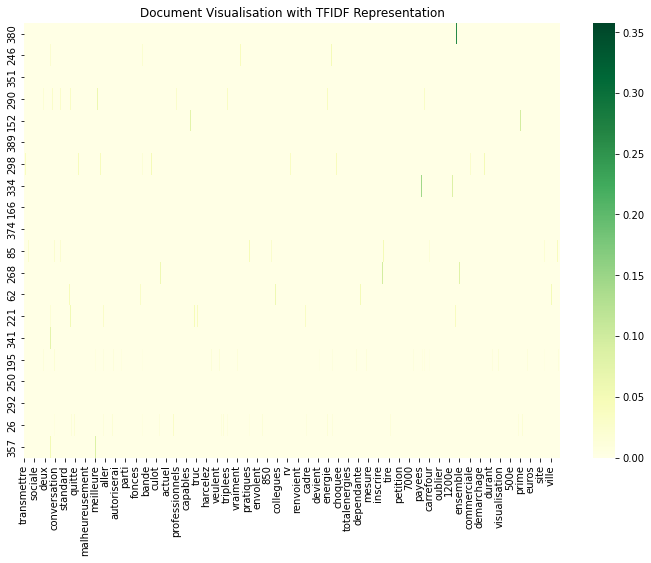

In [245]:
#one way to make more meaningful visualizations is to somehow keep the words that are most frequent
tfidf = pd.DataFrame(list(df.tfIDF))
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf.sample(20), cmap='YlGn')
plt.title('Document Visualisation with TFIDF Representation')
plt.show()

In [246]:
print('A few words with lowest tfidf\n\n',tfidf.apply(sum).sort_values()[:3])
print('\n\nWords with largest tfidf\n\n',tfidf.apply(sum).sort_values()[-3:])

A few words with lowest tfidf

 experience    0.000000
date          0.000000
36712         0.006037
dtype: float64


Words with largest tfidf

 janvier    2.239551
service    2.699233
tres       2.723449
dtype: float64


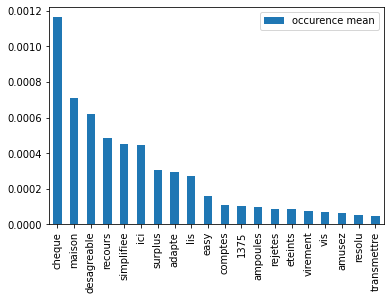

In [248]:
tfidf_mean = tfidf.mean()[:20].sort_values(ascending=False).to_frame(name='occurence mean')
tfidf_mean.plot.bar()
plt.show()

### WordCloud

In [244]:
from wordcloud import WordCloud
from PIL import Image

In [252]:
tfidf_mean = tfidf.mean().sort_values(ascending=False).to_frame(name='tfidf mean')
dict_words_tfidf = tfidf_mean[tfidf_mean['tfidf mean'] != 0].to_dict()['tfidf mean']

In [254]:
tfidf_mean.head()

,tfidf mean
tres,0.006809
service,0.006748
janvier,0.005599
2023,0.005590
decembre,0.005149


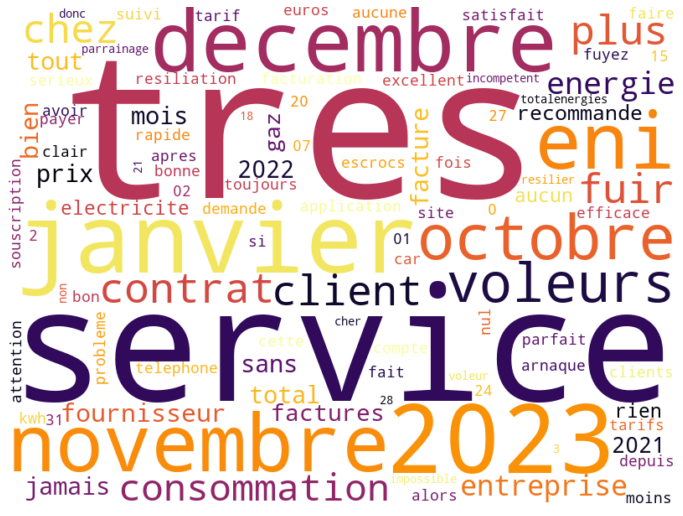

In [256]:
wordcloud = WordCloud(height=600, width=800, background_color="white", colormap='inferno', max_words=100)
wordcloud.generate_from_frequencies(frequencies=dict_words_tfidf)
plt.figure(figsize=(12,16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Lemmatization